
* Overview: Integrate Probability and Statistics, Linear Regression, and Logistic Regression theories
into a cohesive case study that demonstrates their application in predicting an outcome based on
a given dataset.
* Goal: Predict [Outcome] using the dataset provided, utilizing Linear and Logistic Regression
models to analyze and interpret the results.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [ ]:
data = pd.read_csv('bank_customers_train.csv')

In [ ]:
print("Missing values before handling:")
print(data.isnull().sum())

Missing values before handling:
age                  0
job                316
marital             79
education         1653
default           8162
housing            940
loan               940
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


In [ ]:
data.dropna(inplace=True)

In [ ]:
data = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

In [ ]:
X = data.drop(columns=['y'])
y = data['y']

In [ ]:
y = y.map({'yes': 1, 'no': 0})

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
summary = X.describe()

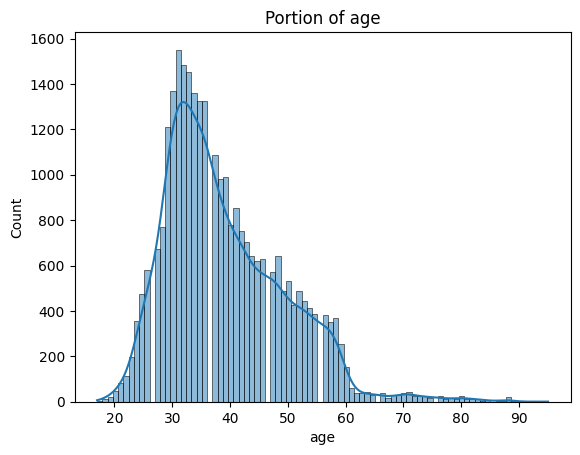

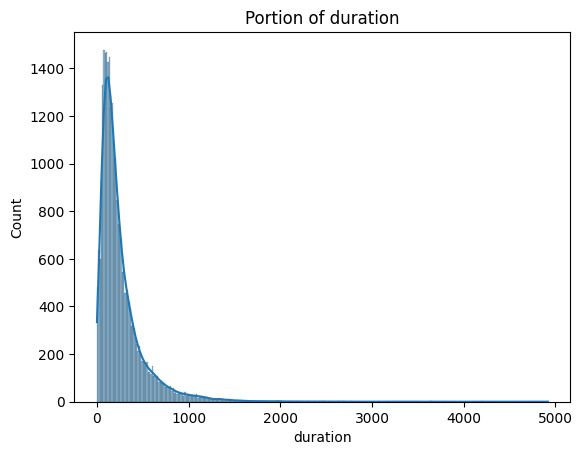

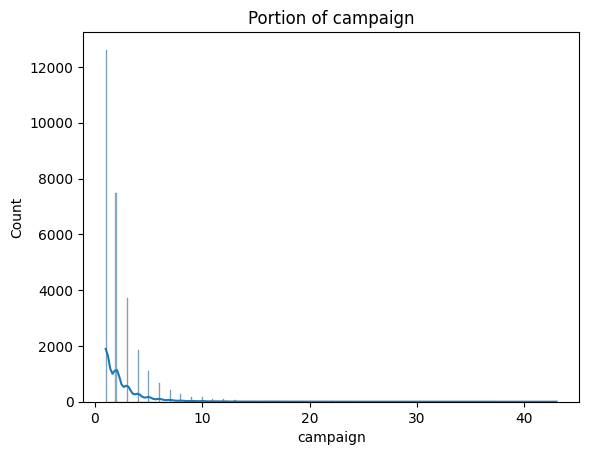

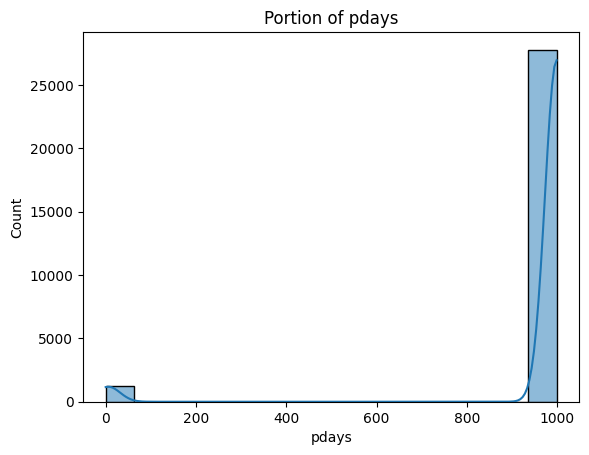

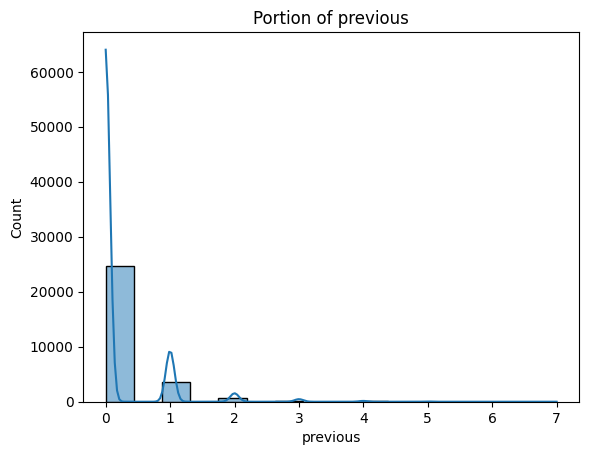

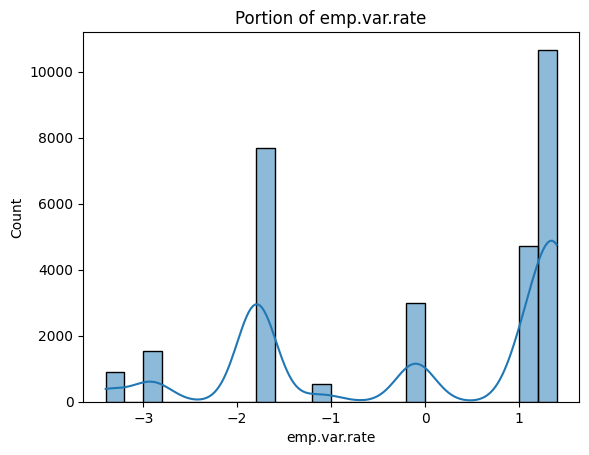

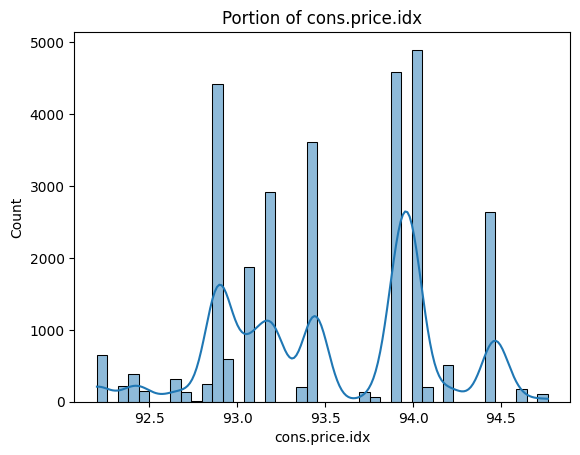

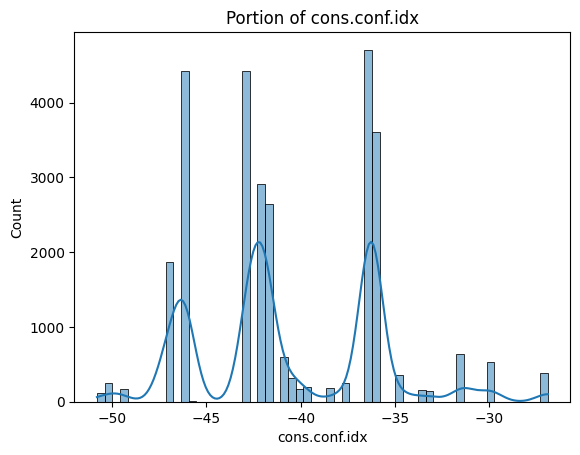

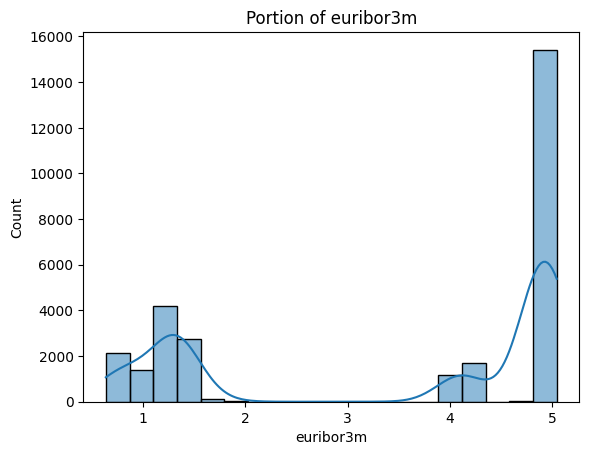

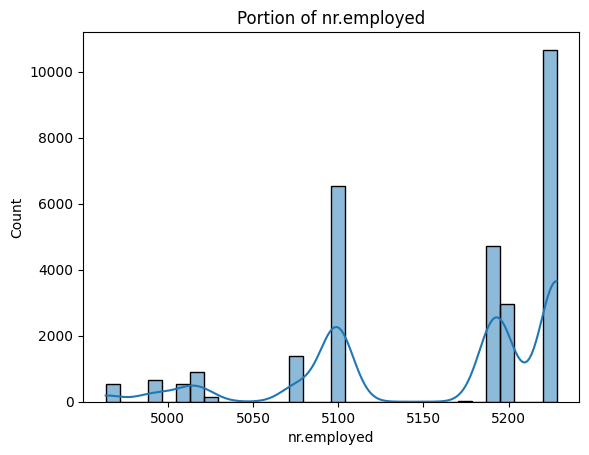

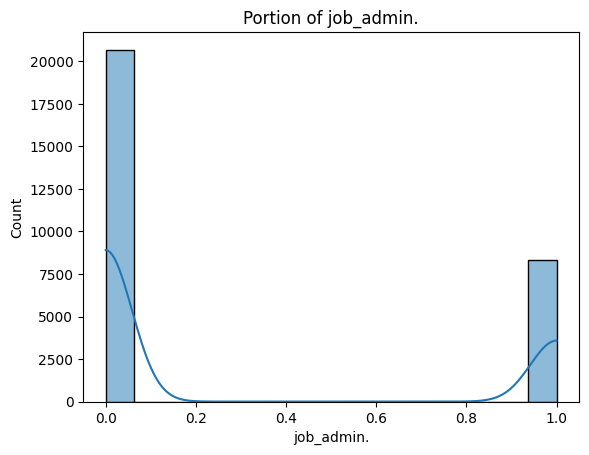

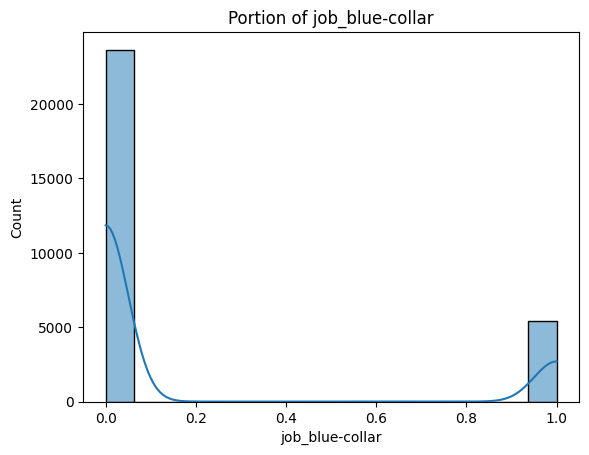

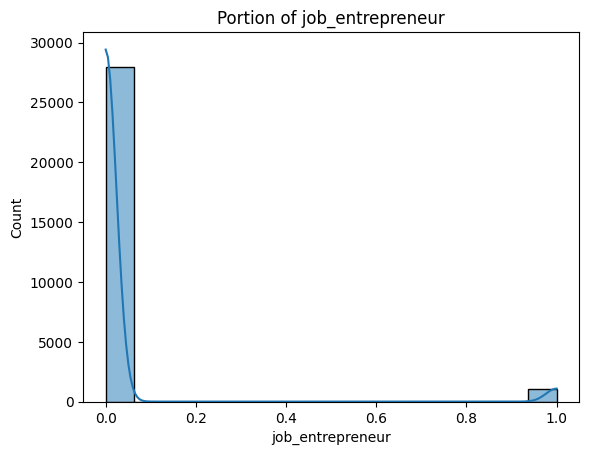

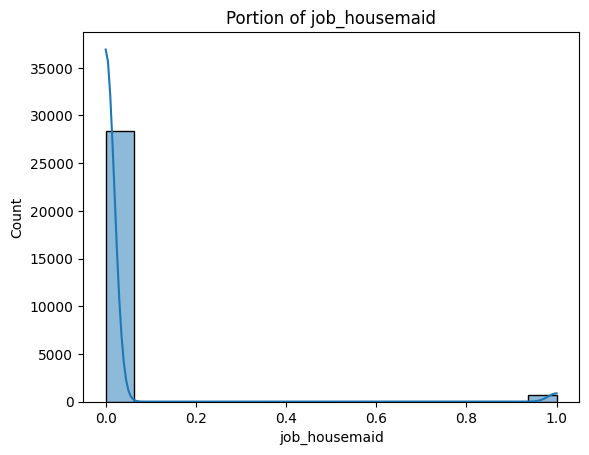

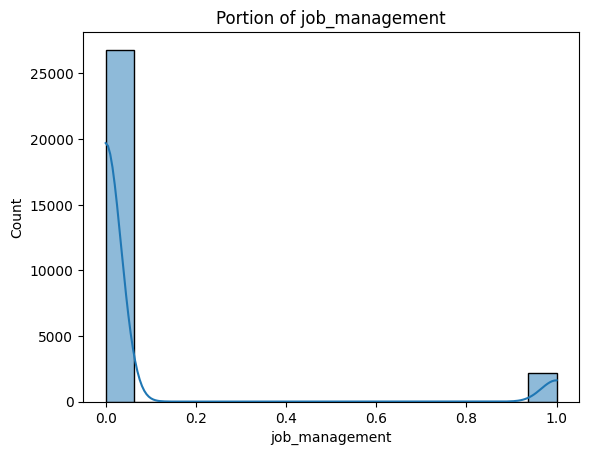

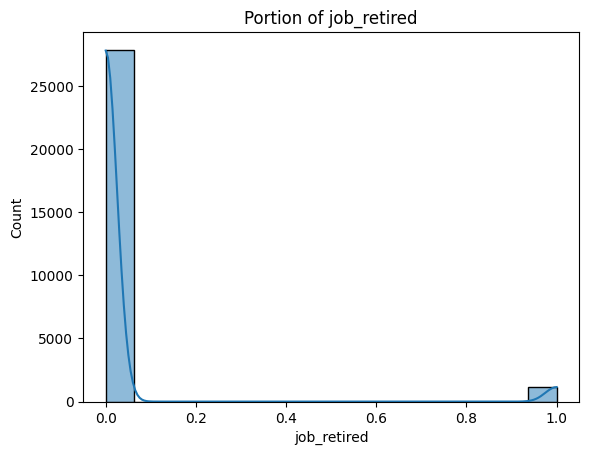

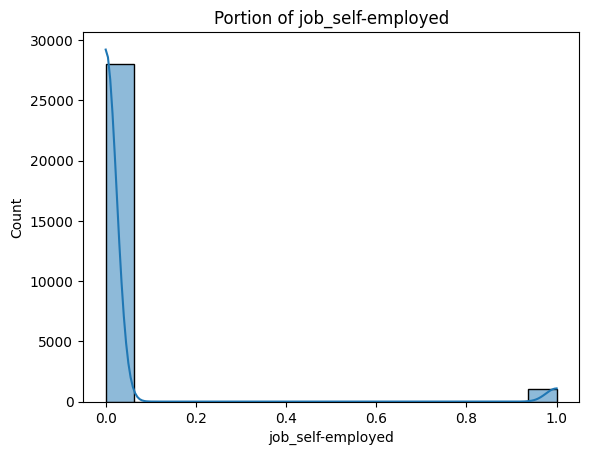

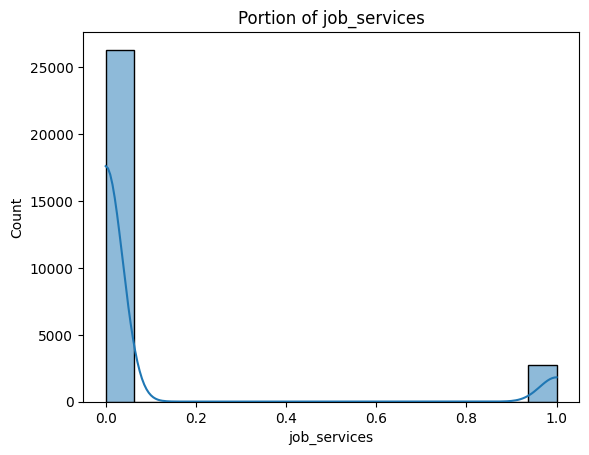

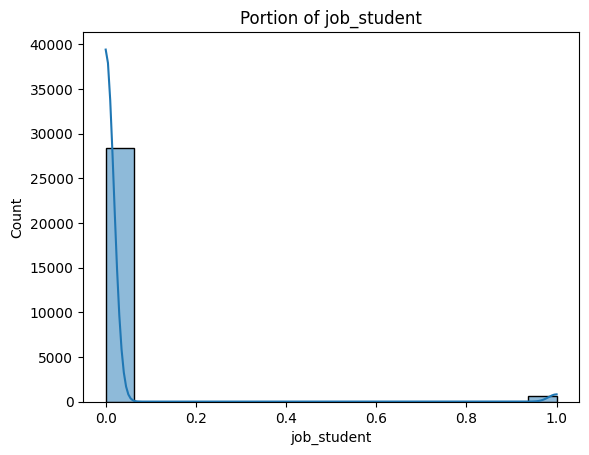

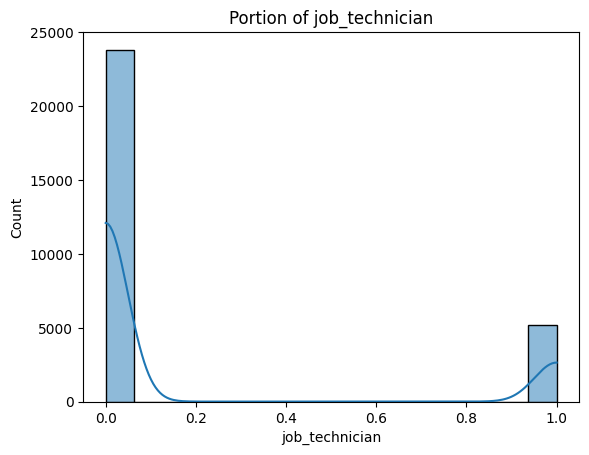

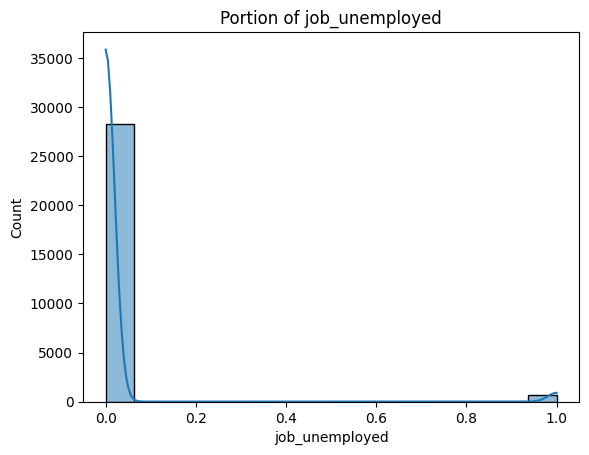

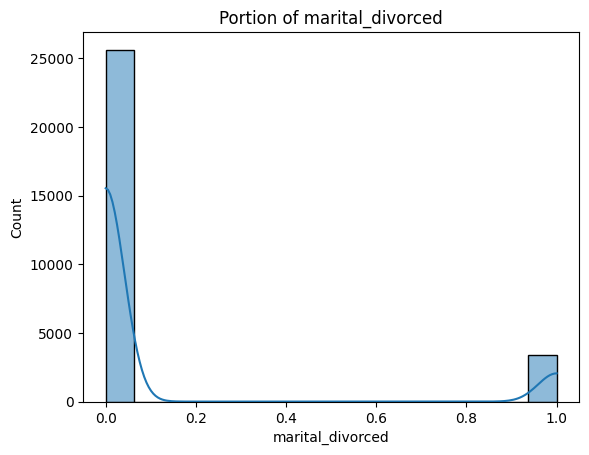

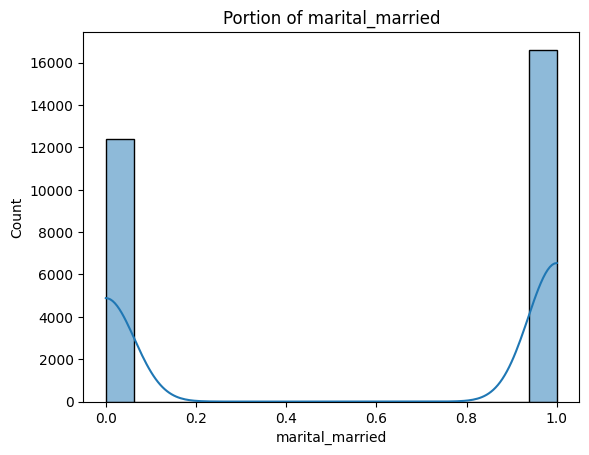

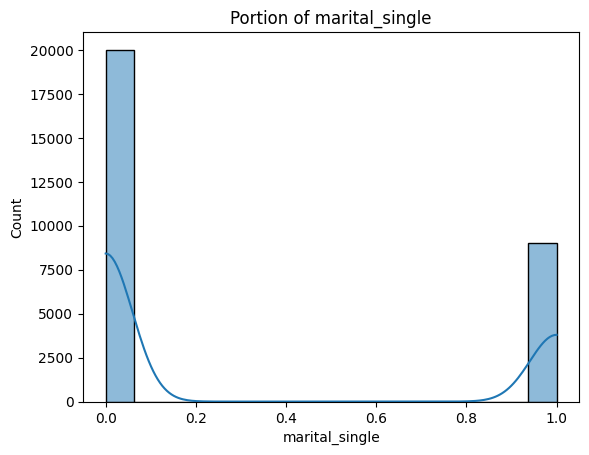

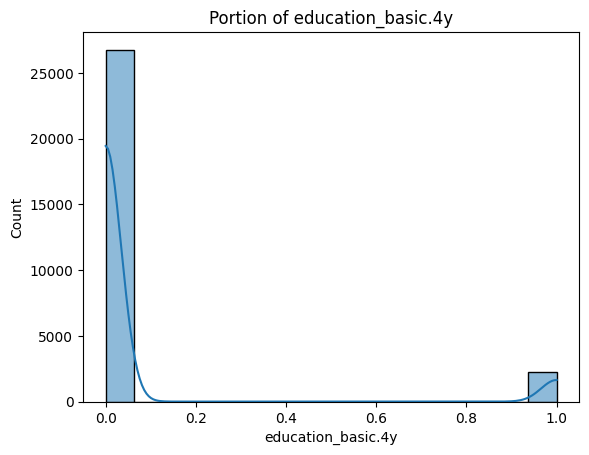

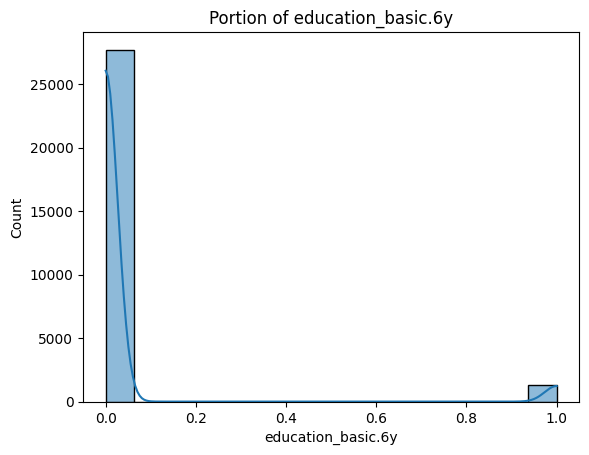

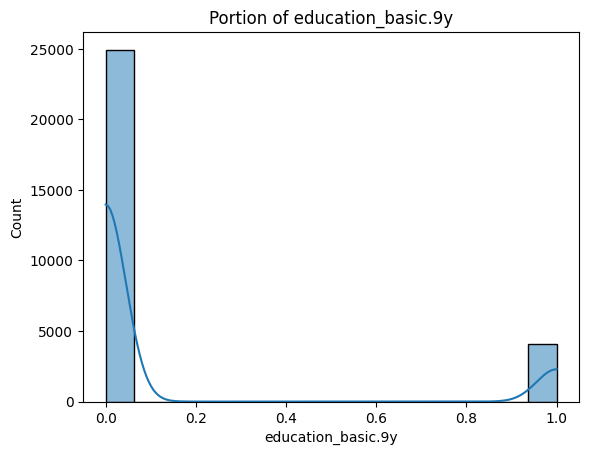

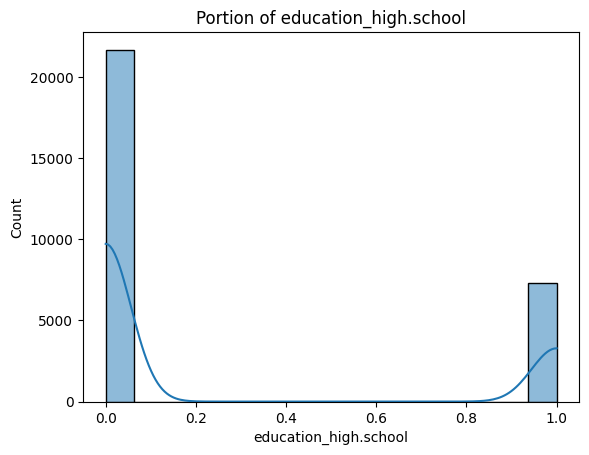

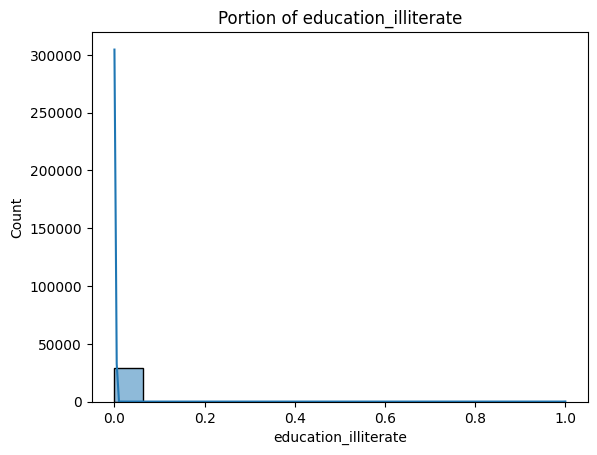

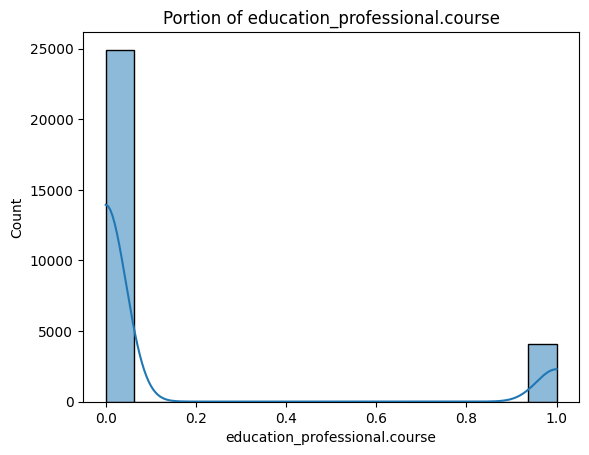

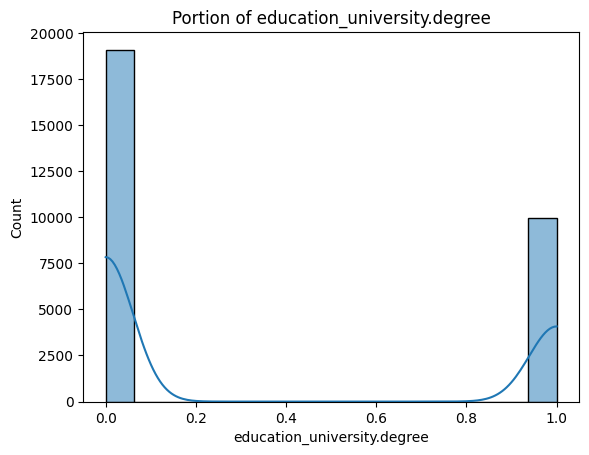

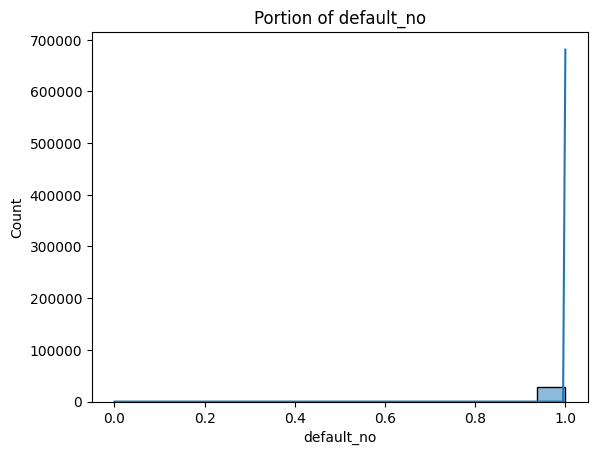

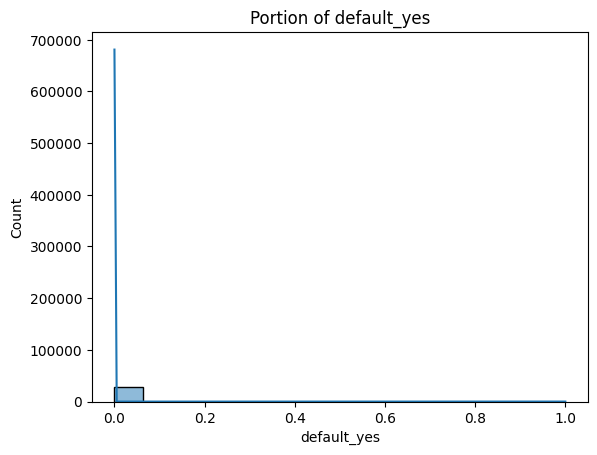

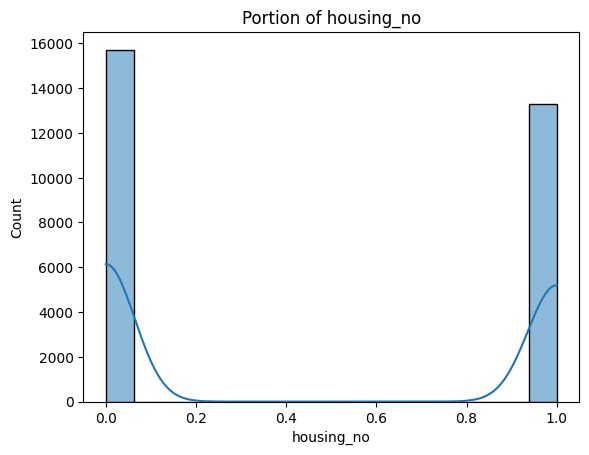

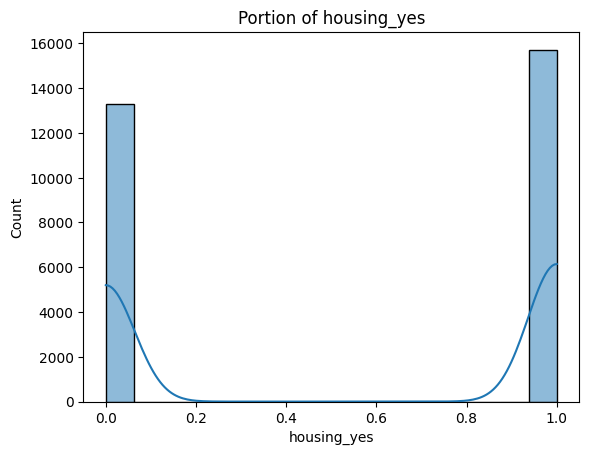

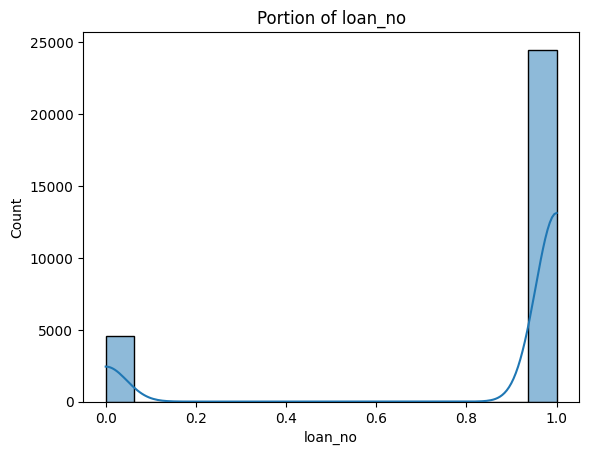

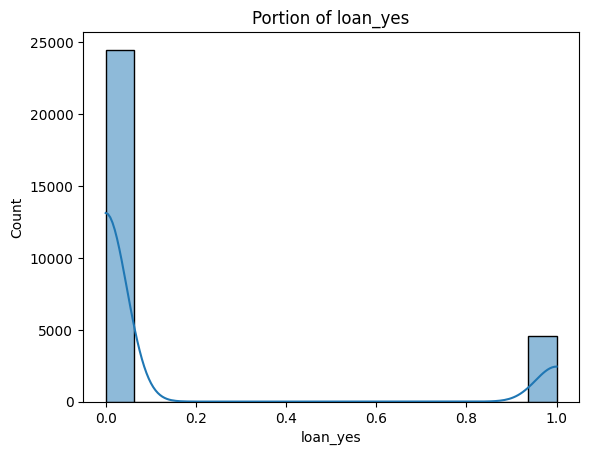

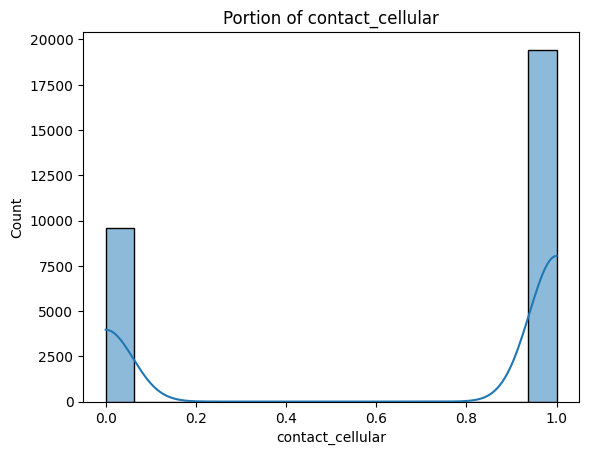

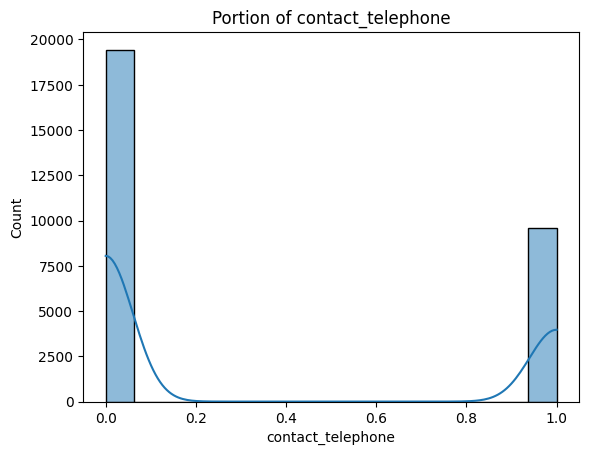

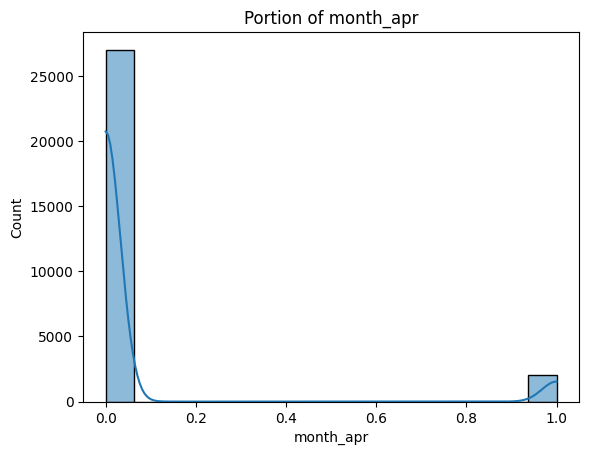

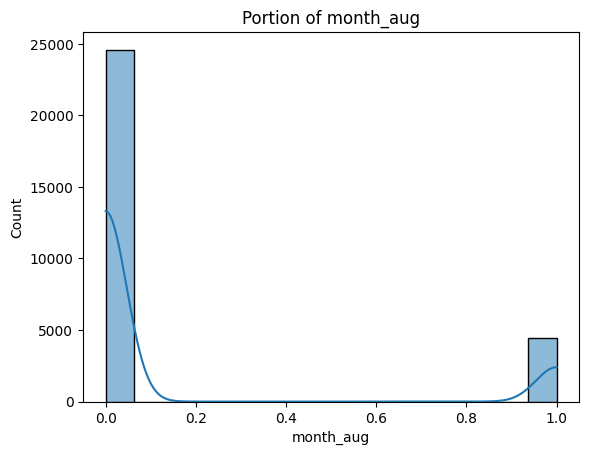

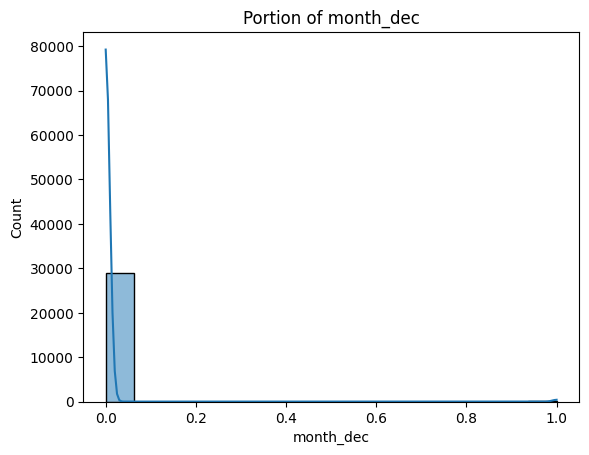

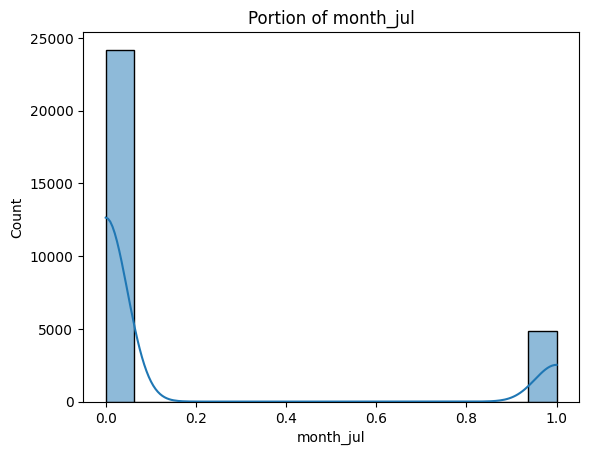

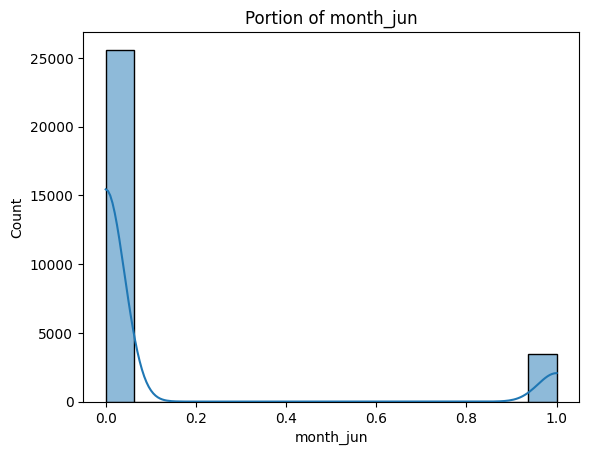

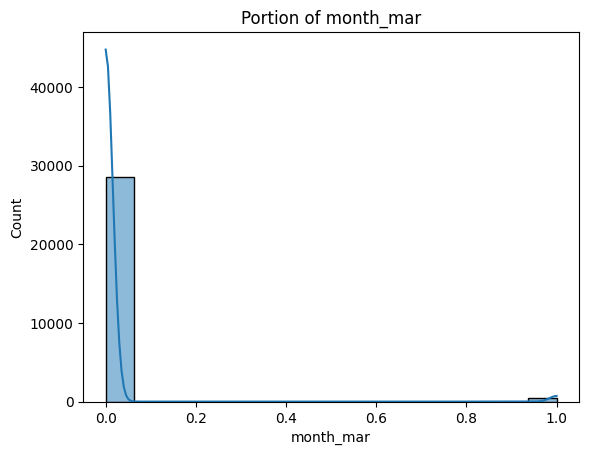

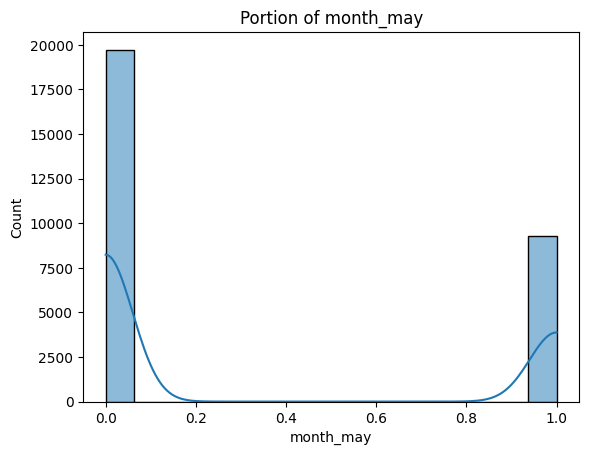

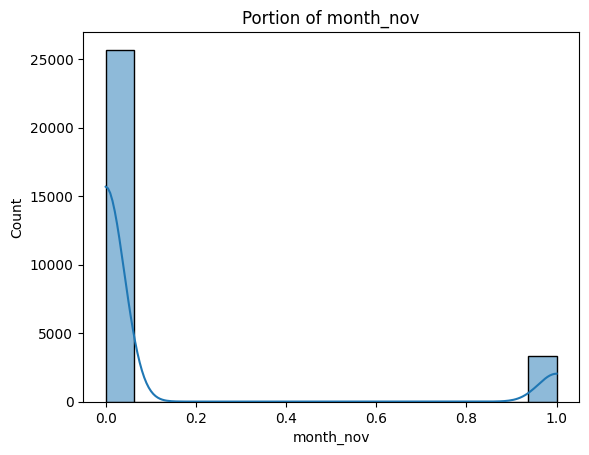

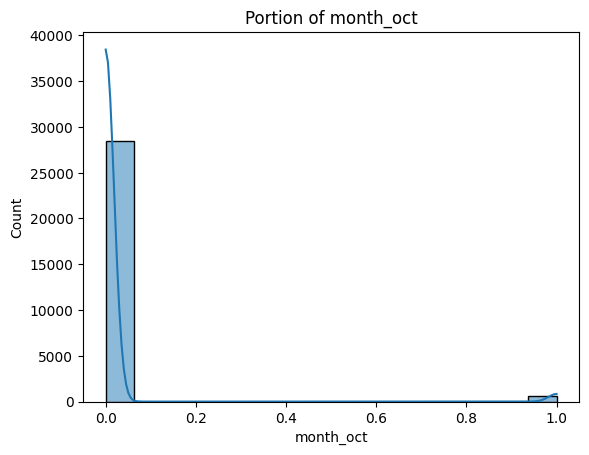

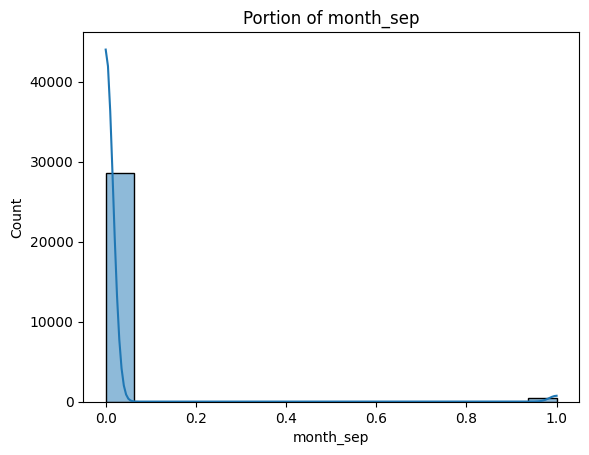

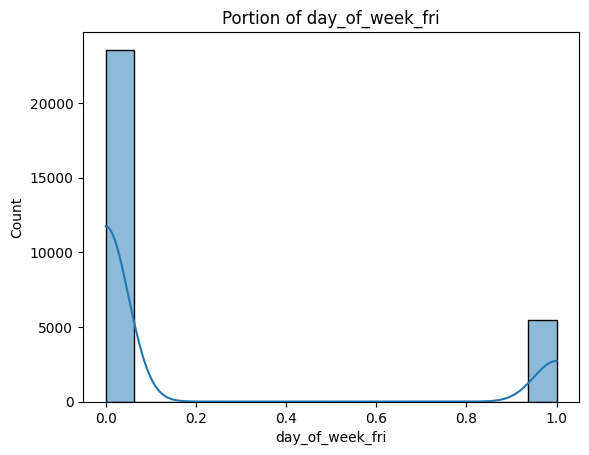

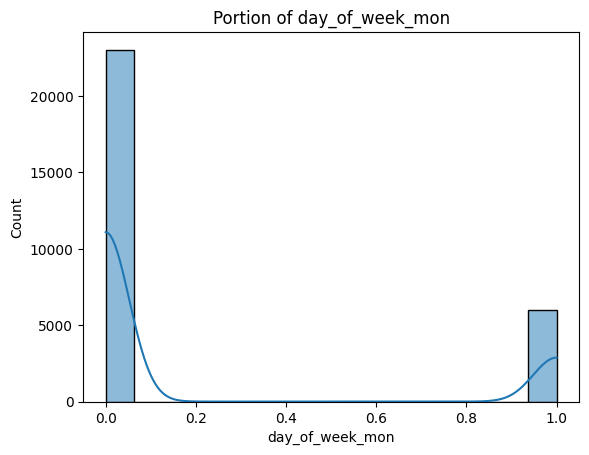

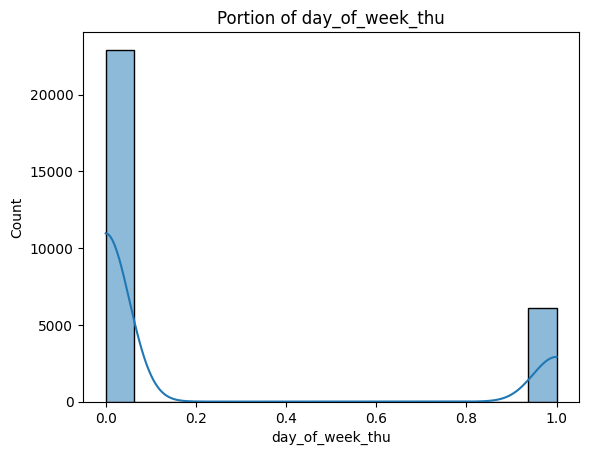

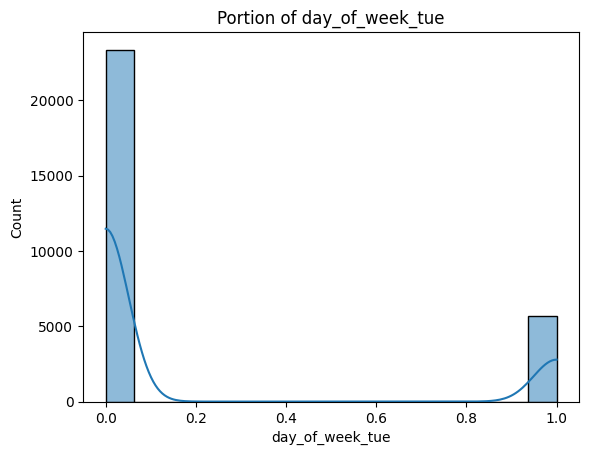

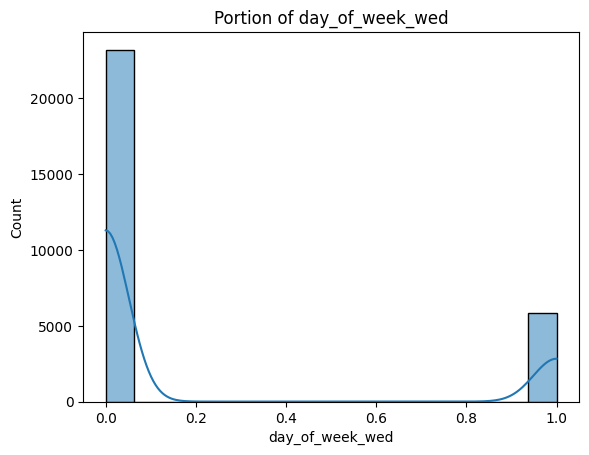

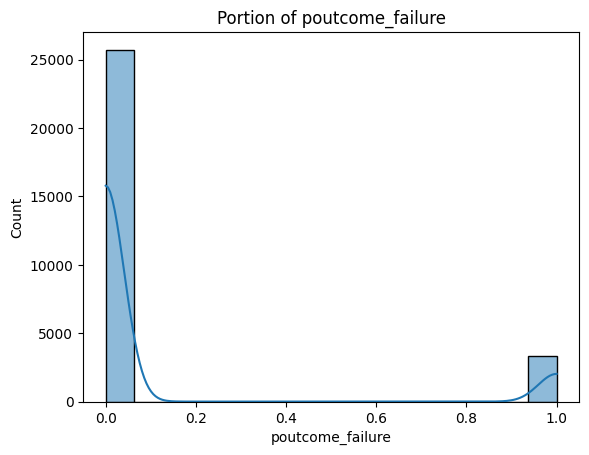

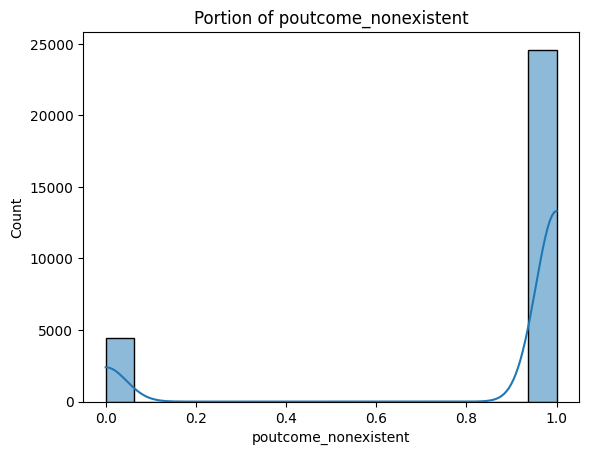

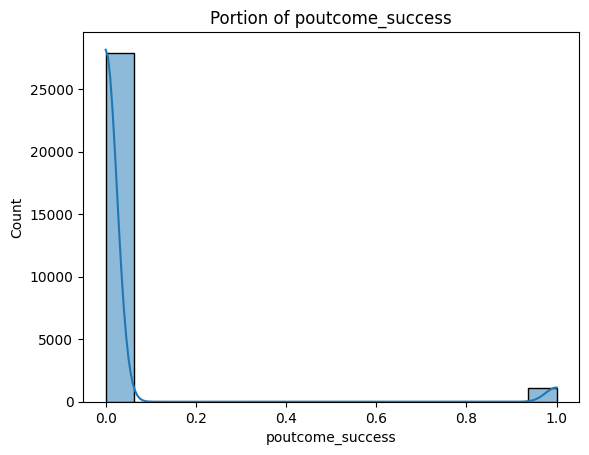

In [ ]:
for column in X.columns:
    sns.histplot(X[column], kde=True)
    plt.title(f'Portion of {column}')
    plt.show()

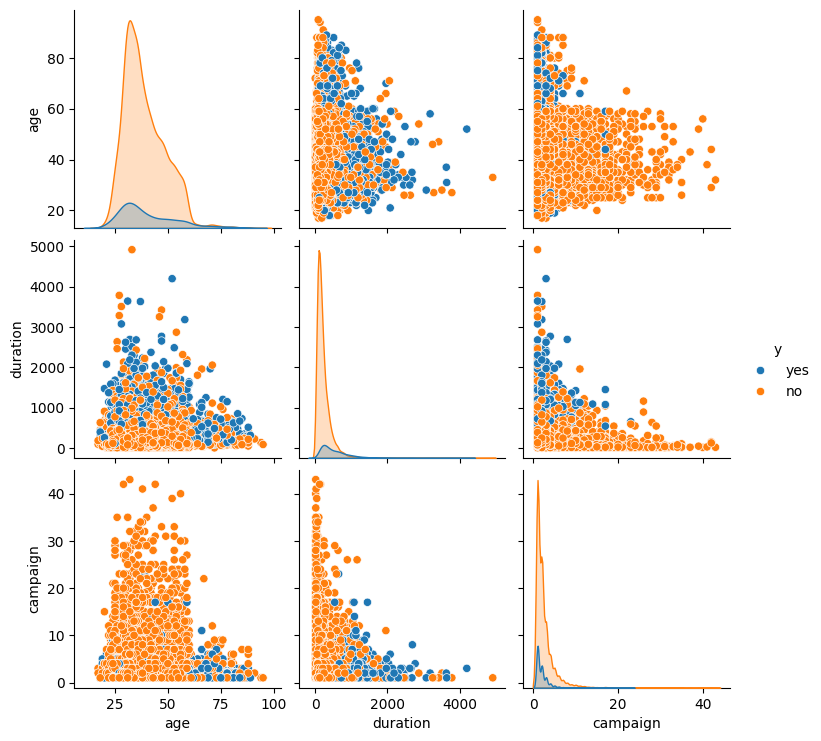

In [ ]:
sns.pairplot(data, vars=['age', 'duration', 'campaign'], hue='y')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_linear = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)

print("Linear Regression R-squared:", linear_r2)
print("Linear Regression MSE:", linear_mse)
print("Linear Regression RMSE:", linear_rmse)


Linear Regression R-squared: 0.3467136313012098
Linear Regression MSE: 0.07440384181528946
Linear Regression RMSE: 0.272770676237915


In [ ]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': linear_model.coef_})
print("Linear Regression Coefficients:")
print(coefficients)

Linear Regression Coefficients:
                         Variable   Coefficient
0                             age -1.840898e-03
1                        duration  1.210924e-01
2                        campaign  2.410030e-03
3                           pdays -3.927218e-02
4                        previous -7.589961e-03
5                    emp.var.rate -3.361513e-01
6                  cons.price.idx  1.540944e-01
7                   cons.conf.idx  1.387218e-02
8                       euribor3m  1.286006e-01
9                     nr.employed  1.232470e-02
10                     job_admin. -7.106978e+10
11                job_blue-collar -6.107004e+10
12               job_entrepreneur -2.910347e+10
13                  job_housemaid -2.350398e+10
14                 job_management -4.164692e+10
15                    job_retired -3.066873e+10
16              job_self-employed -2.929269e+10
17                   job_services -4.572025e+10
18                    job_student -2.207598e+10
19      

In [ ]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_logistic, y_train_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_logistic = logistic_model.predict(X_test_logistic)

In [ ]:
accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
precision = precision_score(y_test_logistic, y_pred_logistic)
recall = recall_score(y_test_logistic, y_pred_logistic)
f1 = f1_score(y_test_logistic, y_pred_logistic)
roc_auc = roc_auc_score(y_test_logistic, y_pred_logistic)

In [ ]:
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


Logistic Regression Metrics:
Accuracy: 0.896830864622804
Precision: 0.6753246753246753
Recall: 0.4099868593955322
F1 Score: 0.5102207686017989
ROC AUC Score: 0.690127225535229


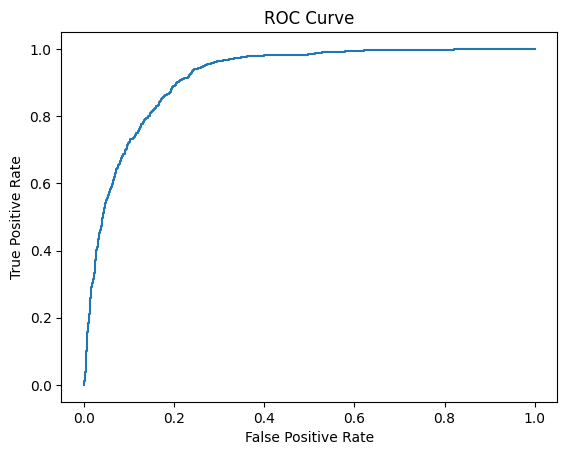

In [ ]:
fpr, tpr, _ = roc_curve(y_test_logistic, logistic_model.predict_proba(X_test_logistic)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

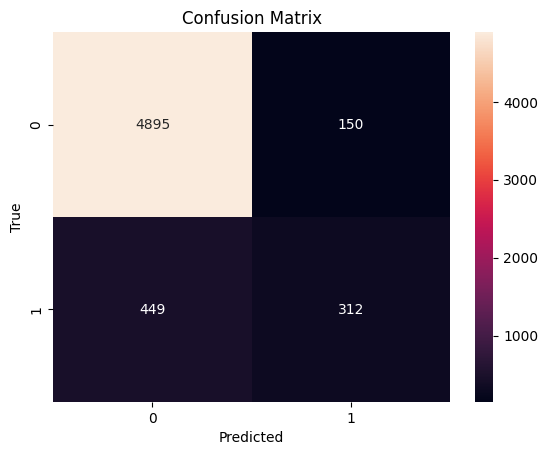

In [ ]:
conf_matrix = confusion_matrix(y_test_logistic, y_pred_logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': logistic_model.coef_[0]})
print("\nLogistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
                         Variable  Coefficient
0                             age     0.000128
1                        duration     0.004431
2                        campaign     0.035221
3                           pdays    -0.001567
4                        previous    -0.109873
5                    emp.var.rate    -0.198338
6                  cons.price.idx     0.435935
7                   cons.conf.idx     0.031727
8                       euribor3m    -0.225667
9                     nr.employed    -0.008015
10                     job_admin.     0.063853
11                job_blue-collar    -0.108285
12               job_entrepreneur    -0.007623
13                  job_housemaid     0.000011
14                 job_management     0.001165
15                    job_retired     0.037783
16              job_self-employed     0.002365
17                   job_services    -0.042162
18                    job_student     0.035332
19                 job_te

Data set
https://www.kaggle.com/datasets/pkdarabi/bank-marketing-dataset

References:
* import pandas as pd
* from sklearn.preprocessing import StandardScaler
* import seaborn as sns
* import matplotlib.pyplot as plt
* from sklearn.model_selection import train_test_split
* from sklearn.linear_model import LinearRegression
* from sklearn.metrics import r2_score, mean_squared_error
* from sklearn.linear_model import LogisticRegression
* from sklearn.metrics import accuracy_score, precision_score, recall_score, * * f1_score, roc_auc_score, roc_curve, confusion_matrix